# 1.2 Linear Regression with PyTorch

we will see now how to implement a really simple task with PyTorch, such as performing a linear regression on two small sets of points. 

The task consists of: given a set of *independent* x values, learn to estimate the relationship (beta) with the corresponding *dependent* y values.

more info: https://en.wikipedia.org/wiki/Regression_analysis

First we import our usual packages

In [26]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Lets create our datapoints, you can copy the same numbers or change them a bit, that wouldn't change our aims to show how the process works

In [27]:
# Toy Dataset 
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

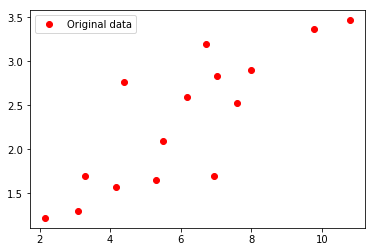

In [28]:
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.legend()
plt.show()

Now we create a really simple model, subclassing **nn.Module** and thus reimplementing its **forward** method, which gets called everytime a call is performed on the instantiated object (like as in **x = model(x)**, which triggers the dunder method **\__call__**, which returns the results of the forward method). 

Our model for the linear regression will consits in just a single linear layer, also known as affine layer or fully connected layer, which applies a linear transformation to the incoming data: `y = Wx + b`. 

So we initialize the layer object and call it with **x** as argument in the **forward** method.

Our Linear layer will have a single input and output value, thats because torch always assumes you send the data in batches through modules, so we will at each step send x_train, and that's the reason of the arrays having an additional dimension.

In [29]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

We can now insantiate our model object, loss function and optimizing algorithm

We use an MSELoss (which stands for Mean Squared Error Loss), that computes the mean squared error between two inputs (the model's output and the actual target/ground truth/etc, the one which should be the correct output).

As optimization algorithm we use the standard gradient descent algorithm (SGD) which consists of the computations of the error and the derivative of each one of the models' parameters with respect to it (the gradients). The algorithm then updates each of the parameters applying `w' = w - lr * dl/dw`.

In [30]:
# single "neural unit" layer
model = LinearRegression(1, 1)
# same as:
# model = nn.Linear(1, 1)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In order to train our simplest model, we loop trough the desired number of epochs, performing an optimization step at every run in the for loop, remember that the model actually sees every data point and its respective y in a single forward pass, so the loss (and the gradients) will be averaged at each step.

In [31]:
# Train the Model 
num_epochs = 60

for epoch in range(num_epochs):
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward + Backward + Optimize
    optimizer.zero_grad()  
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [%d/%d], Loss: %.4f' 
               %(epoch+1, num_epochs, loss.data.item()))
        

Epoch [5/60], Loss: 1.8010
Epoch [10/60], Loss: 0.8392
Epoch [15/60], Loss: 0.4495
Epoch [20/60], Loss: 0.2916
Epoch [25/60], Loss: 0.2276
Epoch [30/60], Loss: 0.2017
Epoch [35/60], Loss: 0.1912
Epoch [40/60], Loss: 0.1869
Epoch [45/60], Loss: 0.1851
Epoch [50/60], Loss: 0.1844
Epoch [55/60], Loss: 0.1841
Epoch [60/60], Loss: 0.1839


We run the SGD algorithm for 60 epochs, let's see what the model has learnt by plotting the regression line (remember y = Wx + b from above?) and the ground truth points

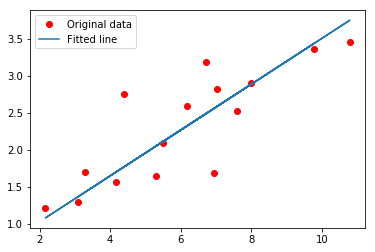

In [32]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

We are done with our task and we can export the model parameters to a file so that we could eventually load it later when neeeded.

In [33]:
# Save the Model
torch.save(model.state_dict(), 'reg-model.pth')